In [3]:
file_path = "/home/vbertalan/Downloads/gpt2_data.json"

def read_first_line_of_json(file_path):
    """
    Reads and returns the first line from a JSON file.
    
    :param file_path: Path to the JSON file
    :return: The first line of the file as a string (including newline if present)
    """
    with open(file_path, 'r', encoding='utf-8') as json_file:
        first_line = json_file.readline()
    return first_line

read_first_line_of_json(file_path)

'key: /nfs/appdata/6500_build/rel/6500_16.90/290147/logs/_6500_build.cc/400G_otn_fmotr_simbc, value: [tput no value for term and no t specified, tput no value for term and no t specified, tput no value for term and no t specified, tput no value for term and no t specified, tput no value for term and no t specified, mv cannot stat no such file or directory, sed can t read temp no such file or directory, error gnu compilers before are not supported anymore, error unsupported toolchain, no such file, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, tput no value for term and no t specified]\n'

In [4]:
import json

file_path = "/home/vbertalan/Downloads/gpt2_data.json"

def extract_value_string(file_path):
    """
    Reads the first 20 lines of a text file where each line has a format like:
    'key: ..., value: [ ... ]'
    and returns the string following 'value:' for each line, excluding any
    leading '[' and trailing ']'.
    
    :param file_path: Path to your file
    :return: List of strings (the part after 'value:' in each of the first 20 lines, 
             without the outer brackets)
    """
    extracted_values = []
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for _ in range(20):
            line = file.readline()
            if not line:
                # No more lines to read
                break
            
            # Remove any leading/trailing whitespace
            line = line.strip()
            
            # Split on "value:"
            if "value:" in line:
                parts = line.split("value:", 1)  # Split once, into [before_value, after_value]
                value_part = parts[1].strip()    # The substring after 'value:'
                
                # If the string starts with '[' and ends with ']', remove them
                if value_part.startswith("[") and value_part.endswith("]"):
                    value_part = value_part[1:-1].strip()
                
                extracted_values.append(value_part)
            else:
                # If the line doesn't contain "value:", append None or skip
                extracted_values.append(None)
    
    return extracted_values

mylist = extract_value_string(file_path)
print(mylist)

['tput no value for term and no t specified, tput no value for term and no t specified, tput no value for term and no t specified, tput no value for term and no t specified, tput no value for term and no t specified, mv cannot stat no such file or directory, sed can t read temp no such file or directory, error gnu compilers before are not supported anymore, error unsupported toolchain, no such file, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, tput no value for term and no t specified', 'jq error at stdin null null has no keys, tput no value for term and no t specified, tput no value for term and no t specified, tput 

In [5]:
print(mylist[1])

jq error at stdin null null has no keys, tput no value for term and no t specified, tput no value for term and no t specified, tput no value for term and no t specified, tput no value for term and no t specified, cp r not specified omitting directory, cp r not specified omitting directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory


In [4]:
def extract_value_string_excluding_brackets_all(file_path, output_file):
    """
    Lê todas as linhas de um arquivo em que cada linha segue o formato:
    'key: ..., value: [ ... ]'
    e retorna a string que aparece após 'value:', removendo os colchetes
    iniciais '[' e finais ']' (se existirem).

    Salva esses valores em um arquivo texto (output_file), onde cada valor
    aparece em uma linha.

    :param file_path: Caminho para o arquivo a ser lido.
    :param output_file: Caminho para o arquivo .txt onde será salvo o resultado.
    :return: Lista de strings (parte após 'value:' em cada linha, sem colchetes).
    """
    extracted_values = []

    # Lê o arquivo de entrada e extrai os valores
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            
            # Verifica se 'value:' está na linha
            if "value:" in line:
                parts = line.split("value:", 1)  # Divide apenas uma vez
                value_part = parts[1].strip()    # Pega o texto depois de 'value:'
                
                # Remove colchetes iniciais e finais, se ambos existirem
                if value_part.startswith("[") and value_part.endswith("]"):
                    value_part = value_part[1:-1].strip()
                
                extracted_values.append(value_part)
            else:
                extracted_values.append(None)

    # Salva os valores extraídos em um arquivo texto
    with open(output_file, 'w', encoding='utf-8') as out_file:
        for val in extracted_values:
            if val is not None:
                out_file.write(val + "\n")
            else:
                # Se quiser, pode escrever algo como "None" ou simplesmente pular
                out_file.write("None\n")

    return extracted_values

file_path = "/home/vbertalan/Downloads/gpt2_data.json"                                              # Substitua pelo caminho real do seu arquivo de entrada
output_file = "/home/vbertalan/Downloads/gpt2_logs.log"                                             # Substitua pelo caminho/arquivo CSV de saída desejado
extract_value_string_excluding_brackets_all(file_path, output_file)

['tput no value for term and no t specified, tput no value for term and no t specified, tput no value for term and no t specified, tput no value for term and no t specified, tput no value for term and no t specified, mv cannot stat no such file or directory, sed can t read temp no such file or directory, error gnu compilers before are not supported anymore, error unsupported toolchain, no such file, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, cp cannot stat no such file or directory, tput no value for term and no t specified',
 'jq error at stdin null null has no keys, tput no value for term and no t specified, tput no value for term and no t specified, tput

In [5]:
def contar_linhas_json(caminho_arquivo):
    with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
        # Contamos cada linha que lemos usando sum(1 for ...)
        quantidade_linhas = sum(1 for _ in arquivo)
    return quantidade_linhas


caminho_do_arquivo = "/home/vbertalan/Downloads/gpt2_data.json"  # Substitua pelo nome ou caminho do seu arquivo JSON
total_linhas = contar_linhas_json(caminho_do_arquivo)
print(f"O arquivo '{caminho_do_arquivo}' possui {total_linhas} linhas.")


import csv

def contar_linhas_arquivo(caminho_arquivo):
    with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
        # Cada iteração corresponde a uma linha
        return sum(1 for _ in arquivo)

caminho_do_arquivo = "/home/vbertalan/Downloads/gpt2_logs.log"  # Substitua pelo caminho do seu arquivo CSV
linhas = contar_linhas_arquivo(caminho_do_arquivo)
print(f"O arquivo '{caminho_do_arquivo}' possui {linhas} linhas.")

O arquivo '/home/vbertalan/Downloads/gpt2_data.json' possui 652096 linhas.
O arquivo '/home/vbertalan/Downloads/gpt2_logs.log' possui 652096 linhas.


In [1]:
from logparser.Drain import LogParser

input_dir = '/home/vbertalan/Downloads/' # The input directory of log file
output_dir = '/home/vbertalan/Downloads/'  # The output directory of parsing results
log_file = 'gpt2_logs.log'  # The input log file name
log_format = '<Content>' # Define log format to split message fields
# Regular expression list for optional preprocessing (default: [])
st = 0.5  # Similarity threshold
depth = 4  # Depth of all leaf nodes

parser = LogParser(log_format, indir=input_dir, outdir=output_dir,  depth=depth, st=st)
parser.parse(log_file)

Parsing file: /home/vbertalan/Downloads/gpt2_logs.log
Total lines:  652096
Processed 0.2% of log lines.
Processed 0.3% of log lines.
Processed 0.5% of log lines.
Processed 0.6% of log lines.
Processed 0.8% of log lines.
Processed 0.9% of log lines.
Processed 1.1% of log lines.
Processed 1.2% of log lines.
Processed 1.4% of log lines.
Processed 1.5% of log lines.
Processed 1.7% of log lines.
Processed 1.8% of log lines.
Processed 2.0% of log lines.
Processed 2.1% of log lines.
Processed 2.3% of log lines.
Processed 2.5% of log lines.
Processed 2.6% of log lines.
Processed 2.8% of log lines.
Processed 2.9% of log lines.
Processed 3.1% of log lines.
Processed 3.2% of log lines.
Processed 3.4% of log lines.
Processed 3.5% of log lines.
Processed 3.7% of log lines.
Processed 3.8% of log lines.
Processed 4.0% of log lines.
Processed 4.1% of log lines.
Processed 4.3% of log lines.
Processed 4.4% of log lines.
Processed 4.6% of log lines.
Processed 4.8% of log lines.
Processed 4.9% of log line

In [ ]:
from transformers import GPT2Tokenizer

# Função auxiliar para ler linhas de um arquivo como lista
def read_lines_from_file(filename):
    with open(filename, "r", encoding="utf-8") as f:
        return [line.strip() for line in f.readlines() if line.strip()]
    
log_lines = read_lines_from_file("gpt2_logs.log")

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Adicionar os log templates como novos tokens no tokenizer
tokenizer.add_tokens(log_lines)

# Definir token de padding
tokenizer.pad_token = tokenizer.eos_token

token_lens = [len(tokenizer(log)["input_ids"]) for log in log_lines]
print(f"Comprimento médio: {sum(token_lens)/len(token_lens):.2f}")
print(f"Máximo: {max(token_lens)}")

In [7]:
noise_path = "/home/vbertalan/Downloads/NoiseTemplates.txt"

def ler_linhas_para_lista(noise_path):
    with open(noise_path, 'r', encoding='utf-8') as arquivo:
        linhas = [linha.strip() for linha in arquivo if linha.strip()]
    return linhas

# Exemplo de uso:
noises = ler_linhas_para_lista(noise_path)

def remover_tokens_especificos(caminho_entrada, caminho_saida, tokens_para_remover):
    # Converte a lista de tokens a remover em um conjunto (já removendo espaços extras) para otimizar a busca
    tokens_remover = set(token.strip() for token in tokens_para_remover)
    
    with open(caminho_entrada, 'r', encoding='utf-8') as arquivo:
        linhas = arquivo.readlines()
    
    novas_linhas = []
    for linha in linhas:
        # Separa os tokens da linha usando a vírgula como delimitador e remove espaços em branco de cada token
        tokens = [token.strip() for token in linha.split(',')]
        # Filtra os tokens removendo aqueles que são exatamente iguais a algum token da lista
        tokens_filtrados = [token for token in tokens if token not in tokens_remover]
        # Junta os tokens filtrados com vírgula e espaço para formar a nova linha
        nova_linha = ', '.join(tokens_filtrados)
        novas_linhas.append(nova_linha + '\n')
    
    with open(caminho_saida, 'w', encoding='utf-8') as arquivo:
        arquivo.writelines(novas_linhas)

# Exemplo de uso:

entrada = "/home/vbertalan/Downloads/gpt2_logs.log"
saida = "/home/vbertalan/Downloads/gpt2_filtered_logs.log"
remover_tokens_especificos(entrada, saida, noises)


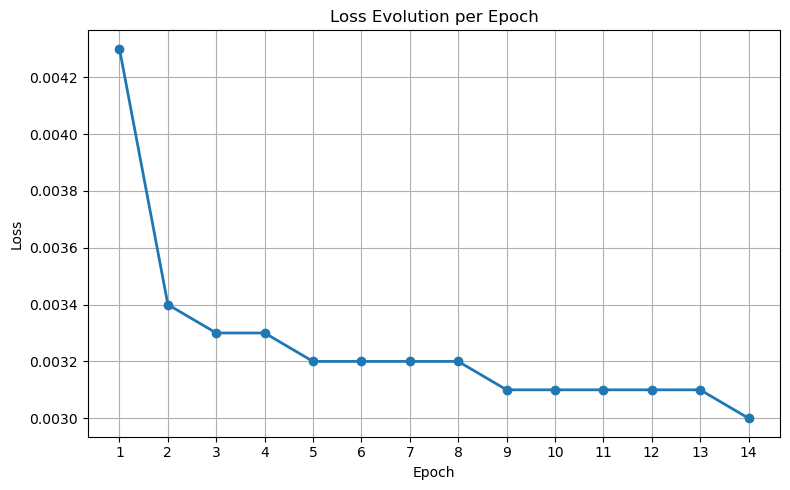

In [2]:
import matplotlib.pyplot as plt

# Dados
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
loss = [0.0043, 0.0034, 0.0033, 0.0033, 0.0032, 0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0030]

# Criar o gráfico
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, marker='o', linestyle='-', linewidth=2)
plt.title('Loss Evolution per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(epochs)
plt.tight_layout()
plt.show()


In [ ]:
import os
import json
import ijson

def extract_templates(events):
    return ["".join(event.get("template", "")) for event in events]

from decimal import Decimal

class DecimalEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, Decimal):
            return float(obj)  
        return super().default(obj)

def save_json(data, path):
    with open(path, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=2, ensure_ascii=False, cls=DecimalEncoder)

# ====== MAIN PIPELINE ======

input_file = 'BigDataJson/whole_dataset_with_special_caracters.json'  
output_dir = 'split_batches_with_sequences'
os.makedirs(output_dir, exist_ok=True)

batch_size = 500
batch = {}
entry_count = 0
file_count = 0

template_to_id = {}
id_to_template = {}
next_template_id = 0

sequence_file_path = os.path.join(output_dir, 'all_sequences.txt')
sequence_file = open(sequence_file_path, 'w')

with open(input_file, 'rb') as f_in:
    parser = ijson.kvitems(f_in, '')  

    for key, value in parser:
        metadata = value.get('metadata')
        group = value.get('group')

        if metadata is not None and group is not None:
            # === Build sequence ===
            templates = extract_templates(group)
            sequence = []
            for template in templates:
                if template not in template_to_id:
                    template_to_id[template] = next_template_id
                    id_to_template[next_template_id] = template
                    next_template_id += 1
                sequence.append(template_to_id[template])
            # Write this sequence to file
            sequence_file.write(' '.join(map(str, sequence)) + '\n')

            # Add to JSON batch
            batch[key] = {'metadata': metadata, 'group': group}
            entry_count += 1

            # Flush batch to file every 500 entries
            if entry_count == batch_size:
                part_path = os.path.join(output_dir, f'part_{file_count}.json')
                save_json(batch, part_path)
                print(f'Saved {part_path}')
                batch = {}
                entry_count = 0
                file_count += 1

# Save any remaining batch
if batch:
    part_path = os.path.join(output_dir, f'part_{file_count}.json')
    save_json(batch, part_path)
    print(f'Saved {part_path}')

sequence_file.close()

# Save mappings
save_json(template_to_id, os.path.join(output_dir, 'template_to_id.json'))
save_json(id_to_template, os.path.join(output_dir, 'id_to_template.json'))

print("All done.")
